Notebook for quickly evaluating optical properties of one or two mirrors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from optical_element_io import *
from column_io import OpticalColumn
from calculate_optical_properties import calc_properties_mirror
from automation import optimize_many_shapes
from importlib import reload
import asyncio

In [2]:
mir = ElecLens("/home/trh/data/mirror/5elec/30kV/curvedspacedmir5elec03_retracing_30kV.dat")
mir.mirror_type(mirror=True,curved_mirror=True)
mir.write("/home/trh/data/mirror/5elec/30kV/curvedspacedmir5elec03_retracing_30kV_test.dat")
col = OpticalColumn(mir)

Reading file /home/trh/data/mirror/5elec/30kV/curvedspacedmir5elec03_retracing_30kV.dat 
with title: mirror3.dat - test mirror 3
Warning! This data file seems to have curvature coordinates. Setting so=True.


In [ ]:
# col.use_mir_img_cond_file("/home/trh/data/mirror/5elec/30kV/mir_curved5_col00_retracing_30kV.dat")
# mir01.coil_curr=[800]
col.write_mir_img_cond_file("/home/trh/data/mirror/5elec/30kV/mir_curved5_col00_opt_retracing_30kV.dat",
                            turning_point=5,source_pos=84.706798,img_pos=84.706898,energy=30000,
                           potentials=MirPotentials(mir,[-500,1583.98,6410.83,10944.1,30000],['f','v1','f','f','f']))
# mir.write_mir_img_cond_file("/home/trh/data/mirror/base/mir_coltest.dat",
#                             turning_point=10,source_pos=60,energy=-100000,screen_pos=60.001,
#                             potentials=ElecLens.MirPotentials(mir,[-10000,10000,-10,10000,100000],['f','v1','v2','v3','f']))
# mir.write_raytrace_file("/home/trh/data/mirror/base/mir_col01.dat",
#                             potentials=ElecLens.MirPotentials(mir,[-500,4568,12573.9,77480.2,200000],['f','f','f','f','f']))
# mir.calc_rays()
# mir.mircondbasename_noext = "m1"
mir.calc_field()
calc_properties_mirror(mir,col)

In [4]:
col.read_mir_optical_properties(raytrace=False)

In [5]:
col.c3

-26.78466763613833

In [ ]:
col.write_raytrace_file("/home/trh/data/mirror/5elec/30kV/mir_curved5_col00_opt_retracing_30kV_rays.dat",
                            minimum_rays=True,source_pos=84.706798,screen_pos=84.706898,energy=30000,
                           potentials=MirPotentials(mir,[-500,1583.98,6410.83,10944.1,30000],['f','v1','f','f','f']))
col.calc_rays()

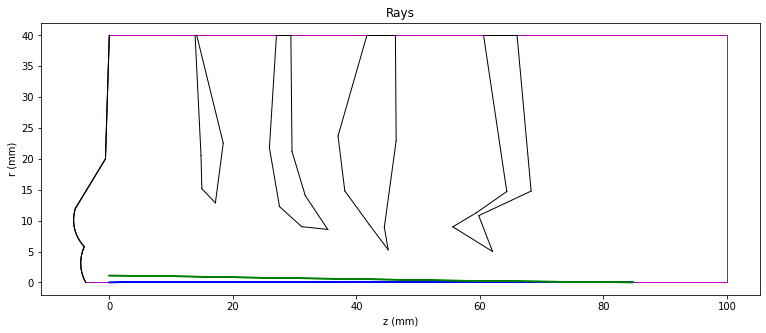

In [7]:
col.plot_rays(coarse_mesh=False,boundary_mesh=True,savefile='/home/trh/data/mirror/5elec/30kV/mir_rays.png')

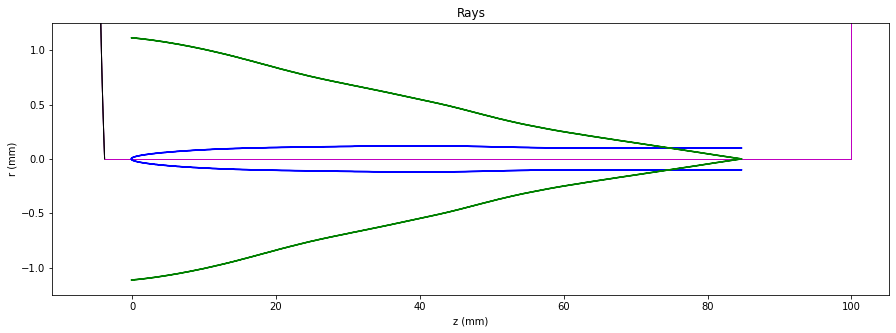

In [8]:
col.plot_rays(ylim=[-1.25,1.25],equal_aspect=False,coarse_mesh=False,boundary_mesh=True,mirror=True,savefile='/home/trh/data/mirror/5elec/30kV/only_rays.png')

In [9]:
help(mir)

Help on ElecLens in module optical_element_io object:

class ElecLens(OpticalElement)
 |  ElecLens(filename='', so=False, plot=False)
 |  
 |  Class for electrostatic lenses and mirrors.
 |  
 |  No arguments.
 |  
 |  User methods:
 |      mirror_type
 |      calc_field
 |  
 |  Method resolution order:
 |      ElecLens
 |      OpticalElement
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  add_quads_to_plot(self)
 |  
 |  calc_field(self)
 |      Calls soelens.exe to calculate electric field for this lens.
 |      
 |      No arguments.
 |  
 |  initialize_lists(self)
 |  
 |  mirror_type(self, mirror, curved_mirror)
 |      Run after initializing ElecLens to classify lens.
 |      
 |      Parameters:
 |          mirror : bool
 |              Indicates whether optical element is a mirror.
 |              Starts as False (initialized in __init__).
 |          curved_mirror : bool
 |              Indicates whether mirror is curved.
 |              Starts as False (initi

In [ ]:
mir2 = ElecLens("/home/trh/data/mirror/base/curvedspacedmir4elec01_bigger_box_tweaked.dat")
mir2.mirror_type(mirror=True,curved_mirror=True)
mir2.write("/home/trh/data/mirror/base/curvedspacedmir4elec01_bigger_box_tweaked_test.dat")
col2 = OpticalColumn(mir2)
# mir201.coil_curr=[800]
col2.write_mir_img_cond_file("/home/trh/data/mirror/base/mir_coltest_test01.dat",
                            turning_point=5,source_pos=70,img_pos=75,
                            potentials=ElecLens.MirPotentials(mir2,[-500,10000,100000,200000],['f','v1','v2','f']))
# mir2.write_mir_img_cond_file("/home/trh/data/mirror/base/mir_coltest.dat",
#                             turning_point=10,source_pos=60,energy=-100000,screen_pos=60.001,
#                             potentials=ElecLens.MirPotentials(mir2,[-10000,10000,-10,10000,100000],['f','v1','v2','v3','f']))
# mir2.write_raytrace_file("/home/trh/data/mirror/base/mir_col01.dat",
#                             potentials=ElecLens.MirPotentials(mir2,[-500,4568,12573.9,77480.2,200000],['f','f','f','f','f']))
# mir2.calc_rays()
# mir2.mircondbasename_noext = "m1"
mir2.calc_field()
calc_properties_mirror(mir2,col2)

In [ ]:
col2.read_mir_optical_properties(raytrace=True)

In [24]:
col.c3

46.8377672303136